In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [25]:
df = pd.read_csv('../Data/data_cleaned.csv')
df = df.drop(columns=['Unnamed: 0'])

In [26]:
country_to_numeric = {'Sub-Saharan Africa': 1, 'Central and Eastern Europe': 2, 'Latin America and Caribbean': 3, 
                     'Western Europe': 4, 'Middle East and Northern Africa': 5, 'Southeastern Asia': 6,
                     'Southern Asia': 7, 'Eastern Asia': 8, 'North America': 9, 'Australia and New Zealand': 10}

df['region'] = df['region'].replace(country_to_numeric)

In [27]:
df.dtypes

country                                            object
region                                              int64
year                                                int64
happiness_score                                   float64
economy_(gdp_per_capita)                          float64
family                                            float64
health_(life_expectancy)                          float64
freedom                                           float64
trust_(government_corruption)                     float64
generosity                                        float64
dystopia_residual                                 float64
food_supply_(kcal/capita/day)                     float64
crude_birth_rate_(births_per_1,000_population)    float64
deaths_-_unsafe_water_source_per_100k_people      float64
deaths_-_conflict_and_terrorism                   float64
dtype: object

In [28]:
X = df.drop(columns=['country', 'region'])
Y = df['region']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, stratify=Y)

In [29]:
pipe = Pipeline([
    ('model', RandomForestClassifier())
])

In [30]:
params = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 30, 40, 50],
    'model__min_samples_leaf': [1, 2, 3],
    'model__min_samples_split': [2, 3, 4, 5] 
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8835412474849094


{'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 3,
 'model__n_estimators': 100}

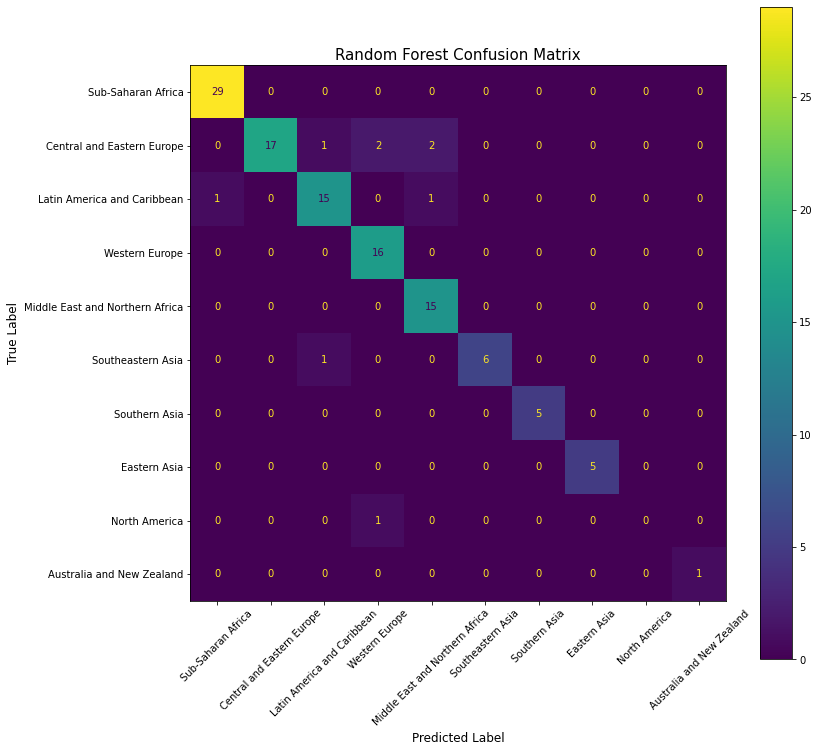

In [31]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Sub-Saharan Africa', 'Central and Eastern Europe', 'Latin America and Caribbean', 
                     'Western Europe', 'Middle East and Northern Africa', 'Southeastern Asia',
                     'Southern Asia', 'Eastern Asia', 'North America', 'Australia and New Zealand'], ax=ax)
plt.xticks(rotation=45)
plt.title('Random Forest Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);
plt.savefig('../Visualizations/RFConfMatr.png', bbox_inches='tight')

In [32]:
y_pred = gs.predict(X_test)

In [33]:
# Inspiration https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.85
Macro Recall: 0.85
Macro F1-score: 0.85

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.92


C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Sub-Saharan Africa', 'Central and Eastern Europe', 'Latin America and Caribbean', 
                     'Western Europe', 'Middle East and Northern Africa', 'Southeastern Asia',
                     'Southern Asia', 'Eastern Asia', 'North America', 'Australia and New Zealand']))


Classification Report

                                 precision    recall  f1-score   support

             Sub-Saharan Africa       0.97      1.00      0.98        29
     Central and Eastern Europe       1.00      0.77      0.87        22
    Latin America and Caribbean       0.88      0.88      0.88        17
                 Western Europe       0.84      1.00      0.91        16
Middle East and Northern Africa       0.83      1.00      0.91        15
              Southeastern Asia       1.00      0.86      0.92         7
                  Southern Asia       1.00      1.00      1.00         5
                   Eastern Asia       1.00      1.00      1.00         5
                  North America       0.00      0.00      0.00         1
      Australia and New Zealand       1.00      1.00      1.00         1

                       accuracy                           0.92       118
                      macro avg       0.85      0.85      0.85       118
                   weight

C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
